# CalTable Guideline
`Update: 2024-11-04`

Calculate Table (`CalTable`) is a robust computational tool designed for interdisciplinary data processing, enabling users to perform calculations with the simplicity of a Pandas DataFrame interface. By connecting seamlessly with EasyAPI, CalTable allows users from various fields to easily manipulate and analyze their data, making complex computations accessible without requiring specialized programming knowledge.

Before this tutorial, please make sure you have setup a EasyAPI server.

## Installation
`pip install -U caltable --index-url https://github.com/Jiarui0923/CalTable`  

## Basic Tutorial
**This section aims to let you learn how to use CalTable easily. For more customization function, please check the next section, advanced tutorial**

Now, let's try the simplest way to use CalTable to compute COREX. 

In [1]:
# import caltable if you have successfully installed it.
import caltable as ct
from pathlib import Path

Before, we start the tutorial, I'd like to provide the shortest code to run code on a folder of PDB files and visualize the result.

In [6]:
workbench = ct.WorkBench.load('corex.workbench.json') # Load work desk
table = ct.DataTable([{'path':str(file)} for file in Path('./data').glob('*.pdb') ]) # Create path table with PDB files from `./data` folder
table[0, 'sconf_weight'] = 0.7 
table = workbench['read-corex'](table) # Read PDB, select chain A, and compute COREX.
table[0, 'corex'] # Visualize COREX result

[9.0s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>...</th>
      <th>87</th>
      <th>88</th>
      <th>89</th>
      <th>90</th>
      <th>91</th>
      <th>92</th>
      <th>93</th>
      <th>94</th>
      <th>95</th>
      <th>96</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.263343</td>
      <td>2.628881</td>
      <td>3.209727</td>
      <td>3.475768</td>
      <td>3.660153</td>
      <td>3.875141</td>
      <td>...</td>
      <td>4.232127</td>
      <td>3.504005</td>
      <td>2.833538</td>
      <td>2.276724</td>
      <td>1.987038</td>
      <td>1.826393</td>
      <td>1.592688</td>
      <td>1.592688</td>
      <td>1.592688</td>
      <td>1.592688</td>
    </tr>
  </tbody>
</table>
<p>1 rows × 97 columns</p>
</div>

In [4]:
table

,path,pdb_id,pdb,chain,corex
0,data\6cdb.pdb,6cdb,PDB:821 lines,A,"COREX (ln(kf)) Values:[-5.000873006361232, -5...."


**REAL TUTORIAL Beginning**  
First step, please load the WorkBench, which is a `*.workbench.json` file.  
Work Bench is a top level object for caltable.  
It is like a desk with all tools placed on it.  
To save the time and simplify the configuration procedure, we have prepared some working desk with possible useful tools for you.  
These desks are stored in file such as `*.workbench.json`.  
So, please load them to use the prepared working desk.

In [3]:
# Load the workbench
# You could replace the file path to other workbench file
workbench = ct.WorkBench.load('corex.workbench.json')
# Then, let's visualize the desk.  
# The `LibIndex` shows all `toolbox` on this desk.  
# There are typically two toolboxs including `local` and `Jellyroll Bioinformatics`. (Later `AWS` maybe here)
# Each toolbox listed all tools inside.
# For example, `local` toolbox has tools to enable you read PDB files (`read-file`) and sheet files (`read-sheet`)
# The COREX tool only provided by a remote server `Jellyroll` in our lab.
# The `workflows` shows some working procedure, protocal, or what you like call it.
# Each workflow is a sequential combination of a set of tools to appoach the calculation target.
workbench

# COREX WorkBench (1.0)  
Provide a set of tools and workflows for COREX computations  
## Workflows  
- **read-corex**: **COREX (Local Files)**: Run COREX for local PDB files.  
- **read-sasa**: **SASA (Local Files)**: Run SASA for local PDB files.  
- **read-bfactor**: **B-Factor (Local Files)**: Fetch residue level b-factor for local PDB files.  
- **read-all**: **Run all things (Local Files)**: Calculate COREX, SASA, and B-factor for local PDB files.  
- **read-pdbs**: **Run PDB files**: Read local PDB files and select chain.  
- **read-table**: **Fetch Local Sheet**: Fetch parameters from local sheet file.  
- **corex**: **COREX**: Run COREX for the pdb column.  
- **sasa**: **SASA**: Run SASA for pdb column.  
- **bfactor**: **B-Factor**: Fetch residue level b-factor for PDB column.  
- **all**: **Run all things**: Calculate COREX, SASA, and B-factor for PDB column.  
## LibIndex  
`2 libs` `8 Algorithms`

  
### local  
- **read-file**: Read local files from the given path.  
- **read-sheet**: Read local sheet file and attach to the table.  


  
### Jellyroll Bioinformatics  
- **select-chain**: Select destinated chains from the given PDB file.  
- **sasa**: Calculate the solvent accessible surface area for the given protein. The results will be an array concatenated by the order of sorted(chains)  
- **corex**: An algorithm designed to compute comformational stability of a protein. The results will be an array concatenated by the order of sorted(chains)  
- **list-chain**: List all chains from the given PDB file.  
- **bfactor**: Extract residue level B-Factor from the given PDB file (The B-Factor of CA atom).  
- **get-pdb**: Get PDB file by PDB ID.  


  
  


In [4]:
# For example, `read-corex` enables you to compute COREX for local PDB files
# We could call it to read its documentation:
# It is combination of read-file, select-chain, list-chain, and corex.
# The `parameters` section shows the optional parameter and required parameters
# The parameter with `[OPTIONAL]` means you can ignore this parameter, caltable will fill it with the default value.
# The without parameter with `[OPTIONAL]` means you must provide it.
workbench['read-corex']

### COREX (Local Files)  

Run COREX for local PDB files.  
  
#### Parameters  
- **path**: (string:**string**)=`None`; The path to the target file; (`None`)   
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) The float number that is greater than 1.  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file  
- **pdb_id**: (string:**string**)=`None`; The file name; (`None`)   
- **chain**: (string:**PDB Chain IDs**)=`None`; The chains contained in the PDB files.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


In [5]:
# Of course, you can read the documentation of each tool
# not only just documentation for workflow provided.
# The same tools may appear in different toolkits,
# CalTable will automatically choose the best one to run.
# For example,
workbench.toolkits['corex']()
# Also, you could build your own workflow by your self.
# We will discuss this later in advanced tutorial.

### (COREX) CORrelation with hydrogen EXchange protection factors  

An algorithm designed to compute comformational stability of a protein. The results will be an array concatenated by the order of sorted(chains)  
  
#### Parameters  
- **pdb**: (string:**PDB File**)=`None`; The input PDB file.; (`None`) The protein PDB file  
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) The float number that is greater than 1.  
#### Returns  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


Now, our working desk is ready. Let's prepare the material (the data)

In [9]:
# This function allows to build a data table from a folder of PDB files
# You could use this function to load any folder of PDB files you want.
# Here, the example is folder `data`
def build_table_with_pdb(path):
    pdb_files = [{'path':str(file)}
                for file in Path(path).glob('*.pdb')
                if file.is_file()]
    return ct.DataTable(pdb_files)
table = build_table_with_pdb('data')
table

,path
0,data\6cdb.pdb


DataTable is the DataFrame of CalTable.  
All inputs and outputs will be stored in a data table.  
What `build_table_with_pdb` do, is just create a list of dictionary with key to be `path` and value to be the path to the pdb file.  
The inputs of the workflow or tool mean CalTable will check whether there is a column named this in the Data Table.  
If there is match one, it will use this column as the input for this paramter.
The outputs of the workflow or tool mean CalTable will store back a data with the format defined to the column named as output name.  

Now, we could start to use the `read-corex` to compute COREX for the PDB file:

In [7]:
# Directly call this workflow with the table
# The PDB read and chain selection will happen on your computer
# The COREX will happen on the remote server
table = workbench['read-corex'](table)
# The result now has been written to the table
table

[8.9s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

,path,pdb_id,pdb,chain,corex
0,data\6cdb.pdb,6cdb,PDB:821 lines,A,"COREX (ln(kf)) Values:[-5.000873006361232, -5...."


Now, let is visualize the results and fetch the values.

In [8]:
# The CalTable will automatically infer the data type and find the best way to visualize it.
# For example:
table[0, 'pdb'] # Index row:0 and column:pdb

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>10</th>
      <th>11</th>
      <th>12</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ATOM</td>
      <td>1</td>
      <td>N</td>
      <td>SER</td>
      <td>A</td>
      <td>6</td>
      <td>-12.615</td>
      <td>82.680</td>
      <td>-12.301</td>
      <td>1.00</td>
      <td>77.47</td>
      <td>N</td>
      <td></td>
    </tr>
    <tr>
      <th>1</th>
      <td>ATOM</td>
      <td>2</td>
      <td>CA</td>
      <td>SER</td>
      <td>A</td>
      <td>6</td>
      <td>-13.722</td>
      <td>82.765</td>
      <td>-13.253</td>
      <td>1.00</td>
      <td>79.72</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>2</th>
      <td>ATOM</td>
      <td>3</td>
      <td>C</td>
      <td>SER</td>
      <td>A</td>
      <td>6</td>
      <td>-13.286</td>
      <td>83.466</td>
      <td>-14.546</td>
      <td>1.00</td>
      <td>75.97</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>3</th>
      <td>ATOM</td>
      <td>4</td>
      <td>O</td>
      <td>SER</td>
      <td>A</td>
      <td>6</td>
      <td>-12.140</td>
      <td>83.325</td>
      <td>-14.972</td>
      <td>1.00</td>
      <td>77.43</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>4</th>
      <td>ATOM</td>
      <td>5</td>
      <td>CB</td>
      <td>SER</td>
      <td>A</td>
      <td>6</td>
      <td>-14.920</td>
      <td>83.495</td>
      <td>-12.624</td>
      <td>1.00</td>
      <td>82.09</td>
      <td>C</td>
      <td></td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>816</th>
      <td>HETATM</td>
      <td>1576</td>
      <td>O</td>
      <td>HOH</td>
      <td>A</td>
      <td>329</td>
      <td>6.394</td>
      <td>91.368</td>
      <td>-26.409</td>
      <td>1.00</td>
      <td>44.30</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>817</th>
      <td>HETATM</td>
      <td>1577</td>
      <td>O</td>
      <td>HOH</td>
      <td>A</td>
      <td>330</td>
      <td>8.334</td>
      <td>61.622</td>
      <td>-9.397</td>
      <td>1.00</td>
      <td>41.71</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>818</th>
      <td>HETATM</td>
      <td>1578</td>
      <td>O</td>
      <td>HOH</td>
      <td>A</td>
      <td>331</td>
      <td>18.823</td>
      <td>71.596</td>
      <td>-22.008</td>
      <td>1.00</td>
      <td>39.77</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>819</th>
      <td>HETATM</td>
      <td>1579</td>
      <td>O</td>
      <td>HOH</td>
      <td>A</td>
      <td>332</td>
      <td>8.916</td>
      <td>78.659</td>
      <td>-10.480</td>
      <td>1.00</td>
      <td>44.23</td>
      <td>O</td>
      <td></td>
    </tr>
    <tr>
      <th>820</th>
      <td>HETATM</td>
      <td>1580</td>
      <td>O</td>
      <td>HOH</td>
      <td>A</td>
      <td>333</td>
      <td>10.487</td>
      <td>79.505</td>
      <td>-13.480</td>
      <td>1.00</td>
      <td>37.28</td>
      <td>O</td>
      <td></td>
    </tr>
  </tbody>
</table>
<p>821 rows × 13 columns</p>
</div>

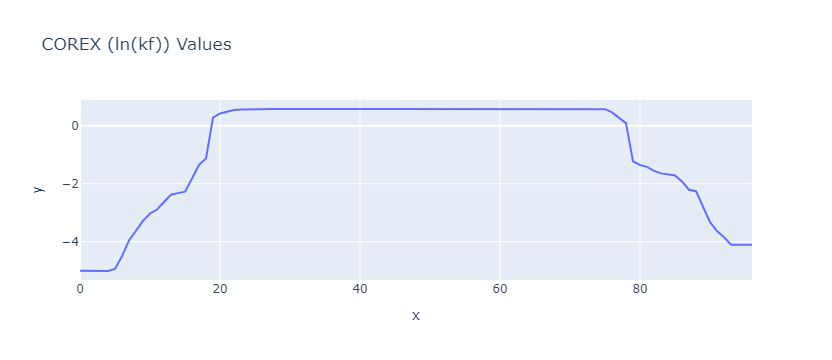

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>...</th>
      <th>87</th>
      <th>88</th>
      <th>89</th>
      <th>90</th>
      <th>91</th>
      <th>92</th>
      <th>93</th>
      <th>94</th>
      <th>95</th>
      <th>96</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-5.000873</td>
      <td>-5.000873</td>
      <td>-5.000873</td>
      <td>-5.000873</td>
      <td>-5.009686</td>
      <td>-4.937238</td>
      <td>-4.497895</td>
      <td>-3.956794</td>
      <td>-3.60389</td>
      <td>-3.280752</td>
      <td>...</td>
      <td>-2.207404</td>
      <td>-2.257786</td>
      <td>-2.818172</td>
      <td>-3.325771</td>
      <td>-3.634638</td>
      <td>-3.841125</td>
      <td>-4.10447</td>
      <td>-4.10447</td>
      <td>-4.10447</td>
      <td>-4.10447</td>
    </tr>
  </tbody>
</table>
<p>1 rows × 97 columns</p>
</div>

In [9]:
# one more example
table[0, 'corex'] # Index row:0 and column:sasa

In [10]:
# Get the values of SASA as a python list
table[0, 'corex'].value

[-5.000873006361232,
 -5.000873006361232,
 -5.000873006361232,
 -5.000873006361232,
 -5.009685541903369,
 -4.937238112919677,
 -4.497895087709894,
 -3.9567944209500143,
 -3.6038903050003195,
 -3.280752244206353,
 -3.0249511364927026,
 -2.8917367439319017,
 -2.629197751435309,
 -2.3769898800571885,
 -2.3251066900766624,
 -2.2758657877828004,
 -1.8200395764391957,
 -1.3496257864683021,
 -1.129376026951422,
 0.2823768625263307,
 0.42393003122716755,
 0.48641748071438073,
 0.5440941953438235,
 0.5546978027736392,
 0.5674313914917283,
 0.5685389550557168,
 0.5712886038442245,
 0.5726394214609651,
 0.5743590898550064,
 0.5745213000706297,
 0.5745139436214154,
 0.5745031057400037,
 0.5745331606606977,
 0.5744144210408718,
 0.5745673106260467,
 0.5746244881643476,
 0.5744239474220431,
 0.5742481529465738,
 0.5742630115382257,
 0.5742806520618297,
 0.574313064646489,
 0.5743148466029661,
 0.5743170708237503,
 0.5743336540497628,
 0.5743236304649434,
 0.5745451772614484,
 0.5751369351917877,
 0.

## Customization Tutorial

We have done basic tutorial. This tutorial used `read-corex`.  
The previous tutorial only allows you to upload a series of PDB and calculate.  
But, it is more powerful than that to allow you to customize more things here.

In [11]:
# First let is fetch the data as before
table = build_table_with_pdb('data')
table

,path
0,data\6cdb.pdb


In [12]:
# Show workflow documentation
workbench['read-corex']

### COREX (Local Files)  

Run COREX for local PDB files.  
  
#### Parameters  
- **path**: (string:**string**)=`None`; The path to the target file; (`None`)   
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) The float number that is greater than 1.  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file  
- **pdb_id**: (string:**string**)=`None`; The file name; (`None`)   
- **chain**: (string:**PDB Chain IDs**)=`None`; The chains contained in the PDB files.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


In [13]:
# From the documentation, we could see the default COREX sampling method is `exhaustive`.
# Let is change this optional parameter to run Monte Carlo.
table[0, 'sampler'] = 'montecarlo' # Set sampler for the first row
table[0, 'samples'] = 50 # Because the protein is small, there is not enough samples, therefore, use smaller sample scale.
table

,path,sampler,samples
0,data\6cdb.pdb,montecarlo,50


In [14]:
# Now workflow `read-corex` will run montecarlo with 50 sample number for the first PDB file
# You could also set different sampler of other parameters for different rows if you have multiple PDBs.
workbench['read-corex'](table)

[9.4s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

,path,sampler,samples,pdb_id,pdb,chain,corex
0,data\6cdb.pdb,montecarlo,50,6cdb,PDB:821 lines,A,"COREX (ln(kf)) Values:[-2.76049764379143, -2.7..."


**More customization!**  
It is not convient if you have a large scale of data.  
Therefore, we also enable read a Excel (xlsx) or CSV (csv) file to load the parameters.  
However, `read-corex` is not support to load a sheet file.  
But we could combine workflow by ourselves to enable this.

In [15]:
# First, check what workflow we have
workbench

# COREX WorkBench (1.0)  
Provide a set of tools and workflows for COREX computations  
## Workflows  
- **read-corex**: **COREX (Local Files)**: Run COREX for local PDB files.  
- **read-sasa**: **SASA (Local Files)**: Run SASA for local PDB files.  
- **read-bfactor**: **B-Factor (Local Files)**: Fetch residue level b-factor for local PDB files.  
- **read-all**: **Run all things (Local Files)**: Calculate COREX, SASA, and B-factor for local PDB files.  
- **read-pdbs**: **Run PDB files**: Read local PDB files and select chain.  
- **read-table**: **Fetch Local Sheet**: Fetch parameters from local sheet file.  
- **corex**: **COREX**: Run COREX for the pdb column.  
- **sasa**: **SASA**: Run SASA for pdb column.  
- **bfactor**: **B-Factor**: Fetch residue level b-factor for PDB column.  
- **all**: **Run all things**: Calculate COREX, SASA, and B-factor for PDB column.  
## LibIndex  
`2 libs` `8 Algorithms`

  
### local  
- **read-file**: Read local files from the given path.  
- **read-sheet**: Read local sheet file and attach to the table.  


  
### Jellyroll Bioinformatics  
- **select-chain**: Select destinated chains from the given PDB file.  
- **sasa**: Calculate the solvent accessible surface area for the given protein. The results will be an array concatenated by the order of sorted(chains)  
- **corex**: An algorithm designed to compute comformational stability of a protein. The results will be an array concatenated by the order of sorted(chains)  
- **list-chain**: List all chains from the given PDB file.  
- **bfactor**: Extract residue level B-Factor from the given PDB file (The B-Factor of CA atom).  
- **get-pdb**: Get PDB file by PDB ID.  


  
  


From this documentation, we could find that, `read-corex` is actually the combination of `read-pdbs` and `corex`.  
And, `read-table` could allow us to load a sheet file.  
Therefore, we could assemble a workflow use these existed workflows to achieve our goal.  

In [7]:
# This new workflow will follow the order of the index order
our_workflow = workbench['read-pdbs', 'read-table', 'corex']
# The documentation will be automatically analyzed and generated
our_workflow

### Combined Workflows  

read-pdbs> read-table> corex  
  
#### Parameters  
- **path**: (string:**string**)=`None`; The path to the target file; (`None`)   
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **sheet_path**: (string:**string**)=`None`; The path to the target sheet file (.csv or .xlsx); (`None`)   
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) The float number that is greater than 1.  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file  
- **pdb_id**: (string:**string**)=`None`; The file name; (`None`)   
- **chain**: (string:**PDB Chain IDs**)=`None`; The chains contained in the PDB files.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


In [10]:
# Now, we see, for our new workflow, there is one more parameter requried that is sheet_path for the Excel/CSV.
# Build Table from PDB files
table = build_table_with_pdb('data')
table[:, 'sheet_path'] = 'parameters.xlsx' # Set sheet_path to be our example sheet `parameters.xlsx`
# `parameters.xlsx`
# The first row is the index, which related to the pdb_id, which is the same as file name without suffix.
# Each column will be a property write as a new column in the data table

In [12]:
# Now, let's try it!
tale = our_workflow(table)

[8.9s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

In [13]:
table[0, 'corex']

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>...</th>
      <th>87</th>
      <th>88</th>
      <th>89</th>
      <th>90</th>
      <th>91</th>
      <th>92</th>
      <th>93</th>
      <th>94</th>
      <th>95</th>
      <th>96</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.120279</td>
      <td>2.263343</td>
      <td>2.628881</td>
      <td>3.209727</td>
      <td>3.475768</td>
      <td>3.660153</td>
      <td>3.875141</td>
      <td>...</td>
      <td>4.232127</td>
      <td>3.504005</td>
      <td>2.833538</td>
      <td>2.276724</td>
      <td>1.987038</td>
      <td>1.826393</td>
      <td>1.592688</td>
      <td>1.592688</td>
      <td>1.592688</td>
      <td>1.592688</td>
    </tr>
  </tbody>
</table>
<p>1 rows × 97 columns</p>
</div>

In [ ]:
# We could also see, there are workflow supports SASA and B-factor
# Let is combine them together
workbench['read-pdbs', , 'read-table', 'sasa', 'bfactor', 'corex']

### Combined Workflows  

read-pdbs> read-table> sasa> bfactor> corex  
  
#### Parameters  
- **path**: (string:**string**)=`None`; The path to the target file; (`None`)   
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **sheet_path**: (string:**string**)=`None`; The path to the target sheet file (.csv or .xlsx); (`None`)   
- **algorithm**: (string:**SASA Algorithm**)_[OPTIONAL]_=`ShrakeRupley`; The SASA algorithms.; (`(ShrakeRupley|LeeRichards)`) (ShrakeRupley|LeeRichards) The SASA Algorithm that could be ShrakeRupley or LeeRichards.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_slices**: (number:**float>1**)_[OPTIONAL]_=`20`; Get the number of slices per atom in Lee & Richards algorithm.; (`{'min': 1}`) The float number that is greater than 1.  
- **record**: (string:**PDB record**)_[OPTIONAL]_=`ATOM`; The PDB record for B-Factor extraction.; (`(ATOM|HETATM)`) (ATOM|HETATM) PDB record names which could be ATOM or HETATM  
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file  
- **pdb_id**: (string:**string**)=`None`; The file name; (`None`)   
- **chain**: (string:**PDB Chain IDs**)=`None`; The chains contained in the PDB files.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **sasa**: (numarray:**SASA Values**)=`None`; The solvent accessible surface area. The order is the same order as the PDB.; (`None`) SASA Values in Sorted Chain ID Order  
- **bfactor**: (numarray:**B-Factor Values**)=`None`; The B-Factor. The order is the same order as the PDB.; (`None`) B-Factor values in given PDB file atom orders  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


In [20]:
table = build_table_with_pdb('data')
table[:, 'sheet_path'] = 'parameters.xlsx'
workbench['read-pdbs', 'read-table', 'sasa', 'bfactor', 'corex'](table)

[8.7s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

,path,sheet_path,pdb_id,pdb,chain,sampler,sasa,bfactor,corex
0,data\6cdb.pdb,parameters.xlsx,6cdb,PDB:821 lines,A,exhaustive,"SASA Values:[1.2696183006775639, 0.84657581949...","B-Factor Values:[79.72, 72.64, 64.68]...(97)","COREX (ln(kf)) Values:[-5.000873006361232, -5...."


## Advanced Tutorial

For this section, we will have a guide line that how to define your own workflow and add new computational resource.

**Build Workflow**  
You could build your own workflow by combine tools.

Let is build a workflow to fetch a PDB from RCSB and compute COREX for it.

In [21]:
new_workflow = ct.Workflow(
    workbench.toolkits['get-pdb'](pdb='pdb'),  # The fetch-pdb tool used to fetch pdb, and the parameter allow you to change the input and output column name.
    workbench.toolkits['select-chain'](pdb='pdb'), # Select Chain
    workbench.toolkits['list-chain'](pdb='pdb'), # List Chain
    workbench.toolkits['corex'](pdb='pdb'), # Compute COREX
    name = 'COREX (Fetch From RCSB)', # name for this workflow
    desc = 'Run COREX on fetched PDB files', # description for this workflow
)
# There maybe the same tool from different toolkits(source). CalTable will automatically choose one.
# The documentation for this workflow will be automatically inferred by CalTable
new_workflow

### COREX (Fetch From RCSB)  

Run COREX on fetched PDB files  
  
#### Parameters  
- **pdb_id**: (string:**PDB ID**)=`None`; The PDB ID or UniProt ID.; (`[A-Za-z0-9]{4}|[A-Za-z0-9]{6}`) The PDB ID, which can be 4 chars for RCSB or 6 chars for UniProt.  
- **source**: (string:**The PDB Source**)_[OPTIONAL]_=`alphafold2-v4`; (Ignore for 4 chars PDB ID) The PDB fetch source for UniProt.; (`alphafold2-v3|alphafold2-v4`) (alphafold2-v3|alphafold2-v4) The PDB fetch source which could be alphafold2-v3 or alphafold2-v4  
- **chain**: (string:**PDB Chain IDs**)_[OPTIONAL]_=`A`; The selected protein chains ID.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **window_size**: (number:**float>1**)_[OPTIONAL]_=`10`; The protein folding unit size. Also, the number of partition schemes.; (`{'min': 1}`) The float number that is greater than 1.  
- **min_size**: (number:**float>1**)_[OPTIONAL]_=`4`; The minumum protein folding unit size.; (`{'min': 1}`) The float number that is greater than 1.  
- **samples**: (number:**float>1**)_[OPTIONAL]_=`10000`; (Ignore for exhaustive sampling) The sample number for each partition scheme. Total sample number=samples*window_size.; (`{'min': 1}`) The float number that is greater than 1.  
- **sampler**: (string:**COREX Sampler**)_[OPTIONAL]_=`exhaustive`; The COREX states sampler; (`(exhaustive|montecarlo|adaptive)`) (exhaustive|montecarlo|adaptive) The COREX micro-states sampler, which could be exhaustive enumerate, Monte Carlo, or Adaptibe Monte Carlo sampler.  
- **threshold**: (number:**float>0**)_[OPTIONAL]_=`0.75`; (Ignore for exhaustive sampling) The threshold for the sampler.; (`{'min': 0}`) The float number that is greater than 0.  
- **sconf_weight**: (number:**float>0**)_[OPTIONAL]_=`1.0`; Entropy factor.; (`{'min': 0}`) The float number that is greater than 0.  
- **base_fraction**: (number:**float>0**)_[OPTIONAL]_=`1.0`; The base fraction used to sum all COREX (ln_kf) values.; (`{'min': 0}`) The float number that is greater than 0.  
- **probe_radius**: (number:**float>1**)_[OPTIONAL]_=`1.4`; The probe radius for SASA in A.; (`{'min': 1}`) The float number that is greater than 1.  
- **n_points**: (number:**float>1**)_[OPTIONAL]_=`1000`; The number of test points in Shrake & Rupley algorithm for SASA.; (`{'min': 1}`) The float number that is greater than 1.  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The output PDB file that only contains selected chains.; (`None`) The protein PDB file  
- **chain**: (string:**PDB Chain IDs**)=`None`; The chains contained in the PDB files.; (`[A-Za-z0-9]+(,[A-Za-z0-9]+)*`) The protein chain ids, seperate with `,`, no blank character.  
- **corex**: (numarray:**COREX (ln(kf)) Values**)=`None`; The COREX values. The order is the same order as the PDB.; (`None`) COREX Values in Sorted Chain ID Order  


In [22]:
# You could check the tool documentation following
workbench.toolkits['get-pdb']()

### Get PDB file  

Get PDB file by PDB ID.  
  
#### Parameters  
- **pdb_id**: (string:**PDB ID**)=`None`; The PDB ID or UniProt ID.; (`[A-Za-z0-9]{4}|[A-Za-z0-9]{6}`) The PDB ID, which can be 4 chars for RCSB or 6 chars for UniProt.  
- **source**: (string:**The PDB Source**)_[OPTIONAL]_=`alphafold2-v4`; (Ignore for 4 chars PDB ID) The PDB fetch source for UniProt.; (`alphafold2-v3|alphafold2-v4`) (alphafold2-v3|alphafold2-v4) The PDB fetch source which could be alphafold2-v3 or alphafold2-v4  
#### Returns  
- **pdb**: (string:**PDB File**)=`None`; The fetched PDB file.; (`None`) The protein PDB file  


In [23]:
# Now, the input only pdb_id is required.
# We could create the table in different way:
# We could also customize parameter here
table = ct.DataTable([{'pdb_id':'6CDB', 'sampler':'exhaustive'}, # For 6CDB we use Exhaustive
                      {'pdb_id':'1AOL', 'sampler':'adaptive'},]) # For 1AOL we use Exhaustive
table

,pdb_id,sampler
0,6CDB,exhaustive
1,1AOL,adaptive


In [24]:
# Let's try it!
table = new_workflow(table)
table

7.1s] ✓ Task (COREX) CORrelation with hydrogen EXchange protection factors Finished.

,pdb_id,sampler,pdb,chain,corex
0,6CDB,exhaustive,PDB:821 lines,A,"COREX (ln(kf)) Values:[-5.000873006361232, -5...."
1,1AOL,adaptive,PDB:2007 lines,A,"COREX (ln(kf)) Values:[19.610296569177322, 19...."


The CalTable could auto decide which server to use, built also, you could force it to choose one:

In [25]:
new_workflow = ct.Workflow(
    workbench.toolkits['get-pdb'](pdb='pdb'),  # The fetch-pdb tool used to fetch pdb, and the parameter allow you to change the input and output column name.
    workbench.toolkits['select-chain'](pdb='pdb'), # Select Chain
    workbench.toolkits['list-chain'](pdb='pdb'), # List Chain
    workbench.toolkits['corex:Jellyroll Bioinformatics'](pdb='pdb'), # Compute COREX (Force Jellyroll server)
    name = 'COREX (Fetch From RCSB)', # name for this workflow
    desc = 'Run COREX on fetched PDB files', # description for this workflow
)

### Add New Computation Resource
Except Jellyroll, we could also add more resource for more tools.

In [26]:
# workbench.toolkits.add(ct.RemoteCalBlockLib(host='', api_id='', api_key=''))